In [5]:
import math
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import graphviz
from sklearn.tree import export_graphviz
from IPython.display import display

import keras
from keras.models import Sequential
from keras.layers import Dense

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
df = pd.read_csv('../Desktop/CHD.csv')
df2 = pd.read_csv('../Desktop/CHD.csv')

all_data = pd.read_csv('../Desktop/CHD.csv')
chd_data = df[df['TenYearCHD']==1]
unchd_data = df[df['TenYearCHD']==0]

target = df['TenYearCHD'].values
del df['TenYearCHD']
df = df.drop(['cigsPerDay','currentSmoker','prevalentStroke','BMI','heartRate','prevalentHyp'],axis="columns")

In [1]:
chd_data

NameError: name 'chd_data' is not defined

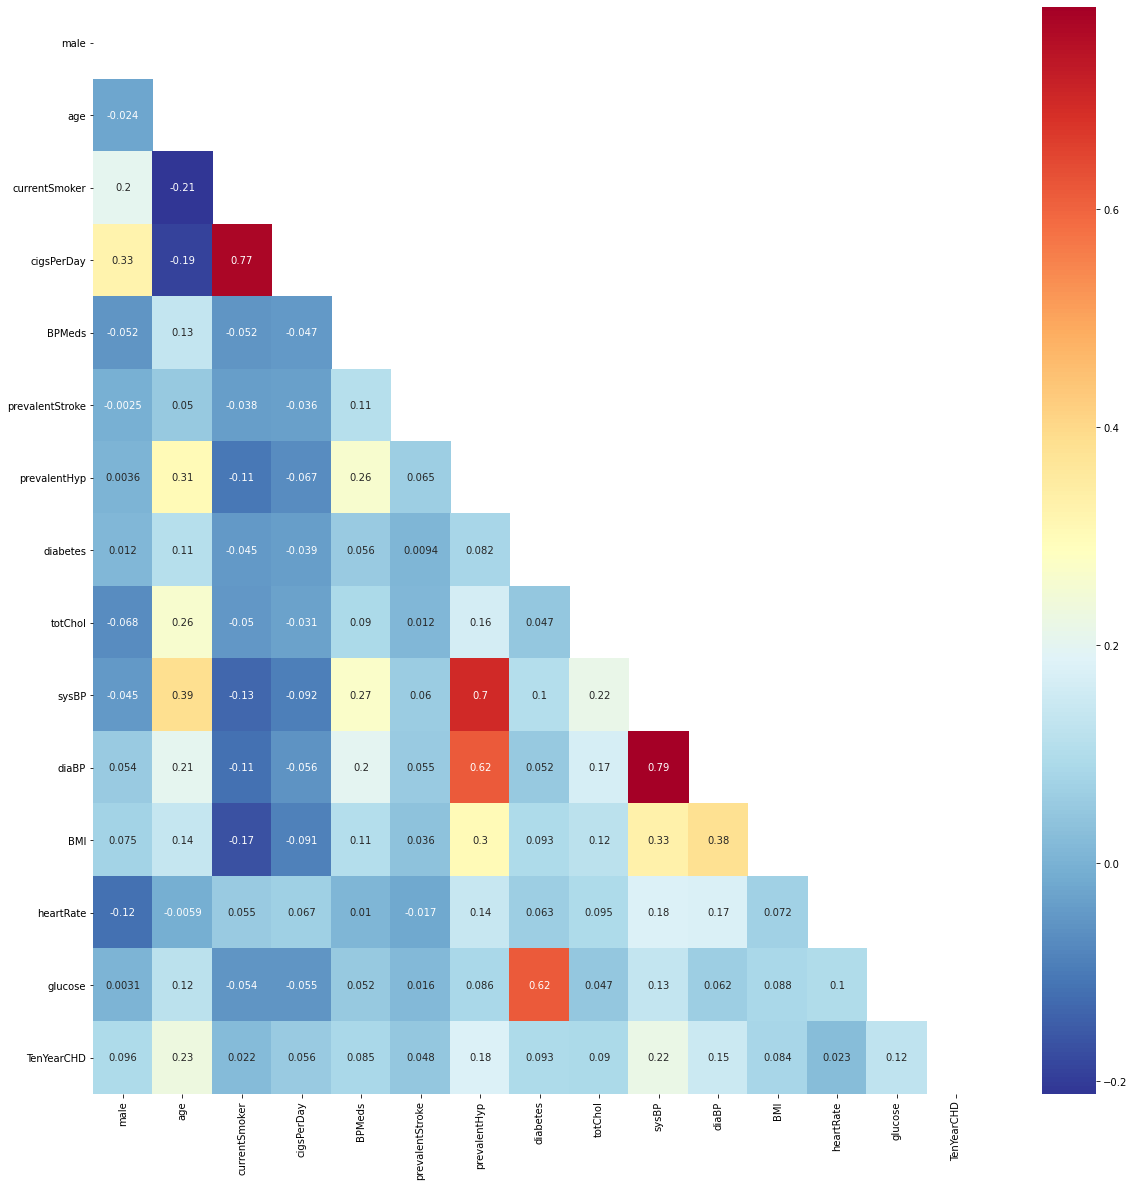

male               0.096000
age                0.231584
currentSmoker      0.021709
cigsPerDay         0.055920
BPMeds             0.084740
prevalentStroke    0.047684
prevalentHyp       0.178615
diabetes           0.093222
totChol            0.089613
sysBP              0.220108
diaBP              0.148994
BMI                0.084400
heartRate          0.022658
glucose            0.124117
TenYearCHD         1.000000
Name: TenYearCHD, dtype: float64


In [7]:
#상관관계 -1부터 1까지 
corrs = df2.corr(method='pearson')
plt.figure(figsize=(20, 20))

mask = np.zeros_like(corrs, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corrs, annot=True, cmap="RdYlBu_r", mask=mask)
plt.show()
print(corrs['TenYearCHD'])

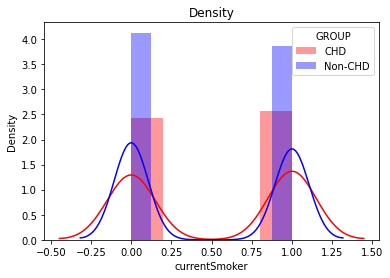

In [8]:
#hist:히스토그램 // kde:Density Curve
sns.distplot(chd_data['currentSmoker'], hist=True, kde=True,color='red',label='CHD')
sns.distplot(unchd_data['currentSmoker'], hist=True, kde=True,color='blue',label='Non-CHD')
#sns.distplot(all_data['age'], hist=True, kde=True,color='yellow',label='ALL')
plt.title('Density')

plt.xlabel('currentSmoker')
plt.ylabel('Density')

plt.legend(prop={'size': 10}, title = 'GROUP')
plt.show()

#plt = df.plot(kind='density',subplots=True,layout=(3,3),sharex=False,sharey=False,fontsize=12,figsize=(15,10))

In [9]:
#test 퍼센트 지정
seed=500
x_train, x_test, y_train, y_test = train_test_split(df.values, target, test_size=0.3, random_state=seed)

In [10]:
#전처리 feature scaling
sc = StandardScaler()
x_train_sc = sc.fit_transform(x_train)
x_test_sc = sc.transform(x_test)

In [11]:
#인공신경망
#relu : 렐루 함수, 은닉층에 주로 사용하는 활성화 함수
#sigmoid : 시그모이드 함수. 이진 분류 문제에서 출력층에 주로 사용되는 활성화 함수
model = Sequential()
model.add(Dense(50,activation='relu',input_dim=df.shape[1], kernel_initializer='he_normal')) #input -> Hidden1
model.add(Dense(20,activation='relu', kernel_initializer='he_normal')) #Hidden1 -> Hidden2
model.add(Dense(1,activation='sigmoid', kernel_initializer='he_normal')) #Hidden2 -> output

In [12]:
#compile
#adam : 경사 하강법
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 50)                450       
_________________________________________________________________
dense_1 (Dense)              (None, 20)                1020      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 21        
Total params: 1,491
Trainable params: 1,491
Non-trainable params: 0
_________________________________________________________________


In [13]:
#Train & Evaluation
#verbose : 학습 중 출력되는 문구 ( 0, 1, 2 값 가능)
history = model.fit(x_train_sc,y_train,epochs=150,batch_size=32,verbose=0,validation_split=0.3)
result = model.evaluate(x_test_sc, y_test, batch_size=32)

36/36 [==============================] - 0s 2ms/step - loss: 0.4282 - accuracy: 0.8481


In [28]:
history.history

{'loss': [0.5185720324516296,
  0.4380166232585907,
  0.418268084526062,
  0.40711599588394165,
  0.4008980095386505,
  0.3970973789691925,
  0.39439380168914795,
  0.3926798403263092,
  0.3893461227416992,
  0.38674965500831604,
  0.3858824372291565,
  0.38404324650764465,
  0.38442304730415344,
  0.38327887654304504,
  0.3831121325492859,
  0.3812848925590515,
  0.3803030848503113,
  0.3793283998966217,
  0.37809228897094727,
  0.3772469162940979,
  0.3775732219219208,
  0.37555429339408875,
  0.37527361512184143,
  0.37376493215560913,
  0.374024897813797,
  0.37303104996681213,
  0.3718816936016083,
  0.3719269335269928,
  0.37067073583602905,
  0.37126481533050537,
  0.3696737289428711,
  0.3683815002441406,
  0.36842960119247437,
  0.36760812997817993,
  0.3654782176017761,
  0.36515647172927856,
  0.3653618395328522,
  0.3641195297241211,
  0.3655395209789276,
  0.3637658357620239,
  0.3615242838859558,
  0.36281612515449524,
  0.3614443838596344,
  0.35985255241394043,
  0.3600

In [30]:
# acc & loss: 매 epoch 마다 훈련 정확도 및 손실값
# val_acc % val_loss: 매 epoch 마다 검증 정확도 및 손실값
print(len(history.history['val_accuracy']))
print("Accuracy:",round(result[1]*100,2),"%")

150
Accuracy: 84.81 %


In [24]:
pred = model.predict(x_test, batch_size=32)

In [25]:
print(pred)
print(y_test)

[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
[0 1 0 ... 0 0 0]


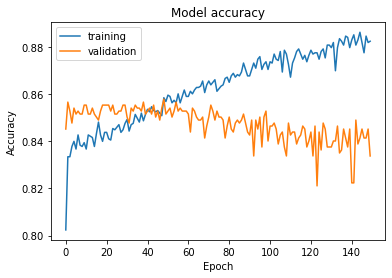

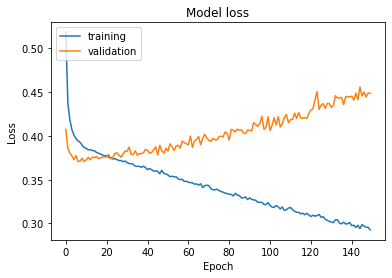

In [31]:
# 학습 정확성 값과 검증 정확성 값을 플롯팅
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

# 학습 손실 값과 검증 손실 값을 플롯팅
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [240]:
#모델 저장(save)과 로드(load)
model.save("model")